In [1]:
import ultralytics
from ultralytics import YOLO

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import torch    
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import torchvision.transforms as transforms
from PIL import Image
import io

In [3]:
plt.rcParams["figure.figsize"] = [6.0, 6.0]

# Just import these 2 modules

In [4]:
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

# For the object detection model

In [5]:
model = YOLO("E:/Research_Papers/Autonomous Pollination/yolo/weights/best.pt")

In [15]:
# image_path = 'D:/CottonWeedDet12/CottonWeedDet12/weedImages/20210628_iPhoneSE_YL_1.jpg'  # Provide the path to your image
# image_path = 'D:/CottonWeedDet12/CottonWeedDet12/weedImages/20210628_iPhoneSE_YL_16.jpg'  # Provide the path to your image
# image_path = 'D:/CottonWeedDet12/CottonWeedDet12/weedImages/20210628_iPhoneSE_YL_28.jpg'  # Provide the path to your image
# image_path = 'D:/CottonWeedDet12/CottonWeedDet12/weedImages/20210827_NIKOND3300_YL_75.jpg'  # Provide the path to your image
# image_path = 'D:/CottonWeedDet12/CottonWeedDet12/weedImages/20210805_iPhoneSE_YL_84.jpg'  # Provide the path to your image
# image_path = 'D:/CottonWeedDet12/CottonWeedDet12/weedImages/20210805_iPhoneSE_YL_89.jpg'  # Provide the path to your image


img = cv2.imread("E:/Research_Papers/Autonomous Pollination/Resource/Heatmap Image/3.jpg")
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

In [16]:
target_layers =[model.model.model[-2]]


0: 640x640 1 Immature, 2 Matures, 1 Aged, 283.1ms
Speed: 6.2ms preprocess, 283.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


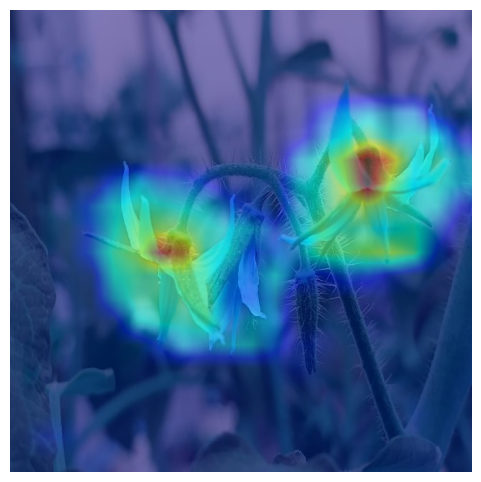

In [17]:
cam = EigenCAM(model, target_layers,task='od')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)

plt.axis("off")
plt.imshow(cam_image)

plt.savefig('E:/Research_Papers/Autonomous Pollination/Resource/Heatmap Image/Eigen_3.png')
plt.show()